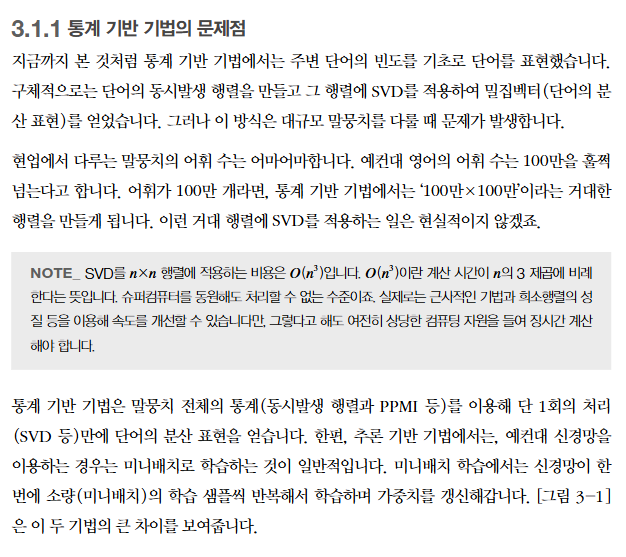

## 추론기반
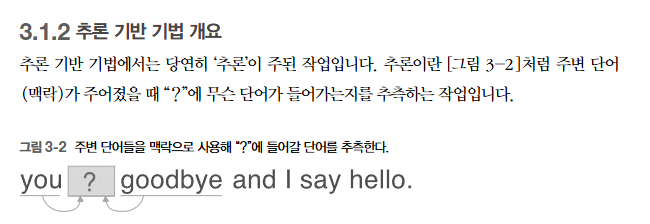
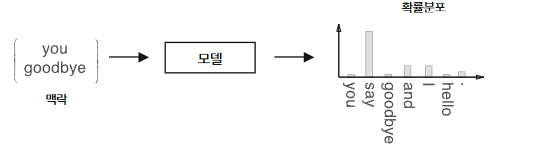

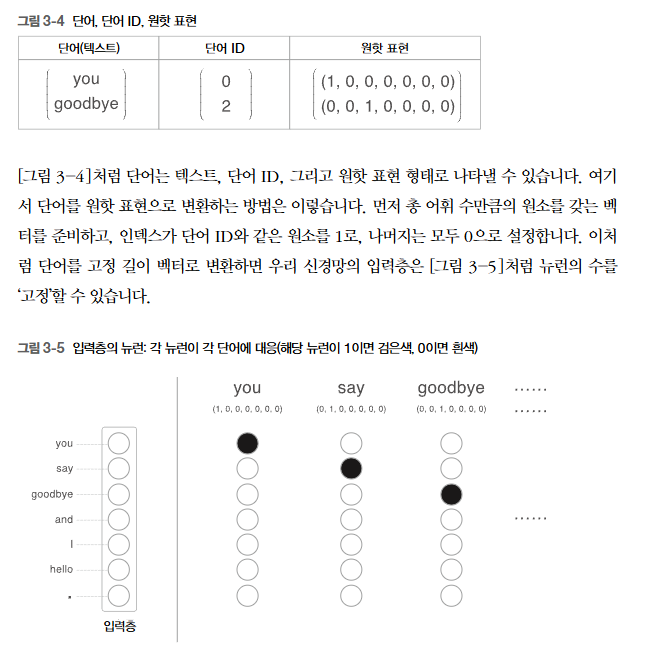
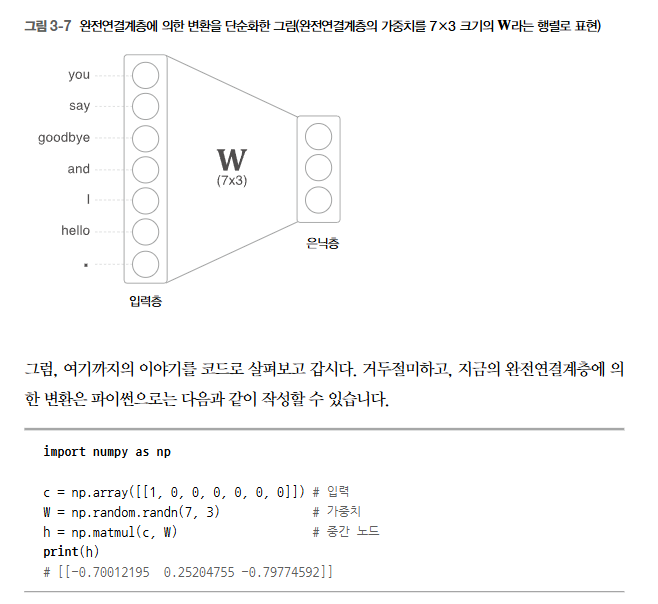

In [1]:
import numpy as np

class MatMul:
    def __init__(self, W):
        """
        가중치 W로 MatMul 레이어를 초기화합니다.

        매개변수:
        W (numpy.ndarray): 가중치 행렬.
        """
        self.params = [W]
        self.grads = [np.zeros_like(W)]
        self.x = None

    def forward(self, x):
        """
        순전파: 입력 x와 가중치 W의 행렬 곱을 계산합니다.

        매개변수:
        x (numpy.ndarray): 입력 데이터 (배치 크기, 입력 차원).

        반환값:
        out (numpy.ndarray): 입력 x와 가중치 W의 행렬 곱 결과.

        예시:
        W = np.array([[1, 2], [3, 4]])  # (2, 2)
        x = np.array([[1, 0], [0, 1]])  # (2, 2)
        out = np.dot(x, W)  # [[1, 2], [3, 4]]
        """
        W, = self.params
        out = np.dot(x, W)
        self.x = x
        return out

    def backward(self, dout):
        """
        역전파: 출력 기울기 dout을 사용해 입력 x와 가중치 W의 기울기를 계산합니다.

        매개변수:
        dout (numpy.ndarray): 출력 기울기 (배치 크기, 출력 차원).

        반환값:
        dx (numpy.ndarray): 입력 x에 대한 기울기.

        예시:
        W = np.array([[1, 2], [3, 4]])  # (2, 2)
        x = np.array([[1, 0], [0, 1]])  # (2, 2)
        dout = np.array([[1, 2], [3, 4]])  # (2, 2)
        dx = np.dot(dout, W.T)  # [[7, 10], [15, 22]]
        dW = np.dot(x.T, dout)  # [[1, 2], [3, 4]]
        """
        print("backward called")
        W, = self.params
        dx = np.dot(dout, W.T)

        print(dx.shape)

        dW = np.dot(self.x.T, dout)
        
        print(dW.shape)
        self.grads[0][...] = dW
        return dx


In [2]:
import numpy as np

C=np.array([1,0,0,0,0,0,0])
W=np.random.randn(7,3)
layer=MatMul(W)
layer

In [3]:
out=layer.forward(C)
out

array([ 0.26901279, -1.62036624,  1.57314229])

In [4]:
W.shape

(7, 3)

In [5]:
d=np.array([ 0.67307741,  1.42008024, -0.45559079])

In [6]:
layer.x.T.shape,layer.grads # (7.3) (7,1)->(7,1)dot(7,3)

((7,),
 [array([[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]])])

In [7]:
layer.backward(W) # W(7.3) (7,3)->(3,7)

backward called
(7, 7)
(3,)


array([[ 5.17273132,  0.91131315, -1.80099031,  1.7386177 ,  3.55273836,
         2.22531301,  0.33839064],
       [ 0.91131315,  1.00758001, -1.29935596,  2.30000516,  1.89849578,
        -0.26412078, -0.22666224],
       [-1.80099031, -1.29935596,  5.72064182, -2.24759049, -0.35944137,
         3.63472935, -0.93894797],
       [ 1.7386177 ,  2.30000516, -2.24759049,  5.39032963,  4.58767341,
        -0.1790422 , -0.75522177],
       [ 3.55273836,  1.89849578, -0.35944137,  4.58767341,  5.75194054,
         2.71335105, -0.88369519],
       [ 2.22531301, -0.26412078,  3.63472935, -0.1790422 ,  2.71335105,
         4.83187308, -0.69642303],
       [ 0.33839064, -0.22666224, -0.93894797, -0.75522177, -0.88369519,
        -0.69642303,  0.45505862]])

In [8]:
layer.x.T.shape,layer.grads # (7.3) (7,1)->(7,1)dot(7,3)

((7,),
 [array([[ 0.26901279, -1.62036624,  1.57314229],
         [ 0.26901279, -1.62036624,  1.57314229],
         [ 0.26901279, -1.62036624,  1.57314229],
         [ 0.26901279, -1.62036624,  1.57314229],
         [ 0.26901279, -1.62036624,  1.57314229],
         [ 0.26901279, -1.62036624,  1.57314229],
         [ 0.26901279, -1.62036624,  1.57314229]])])

## simple word2vec

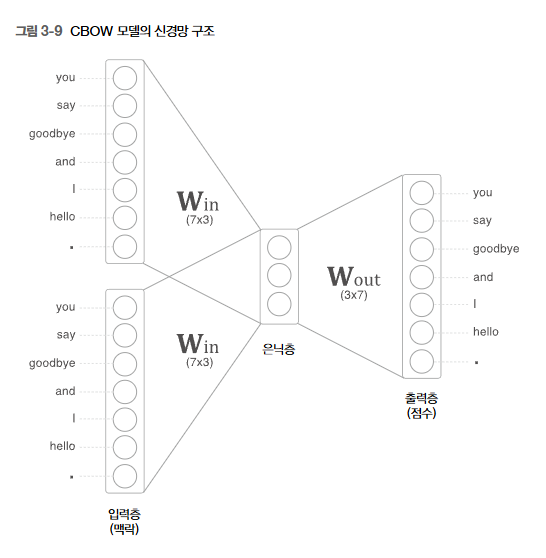
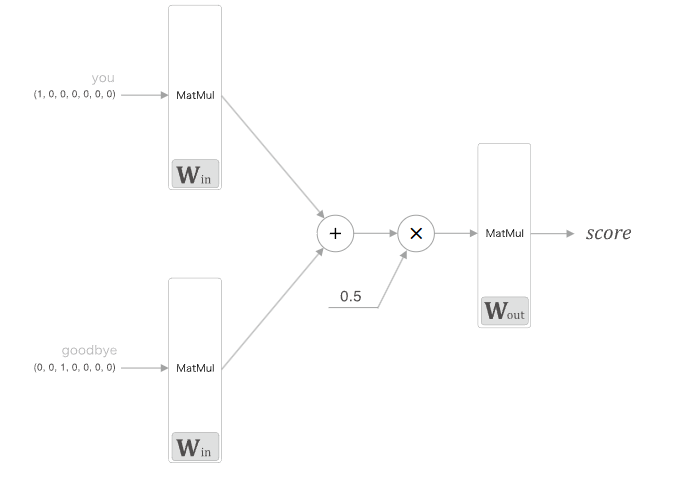

### 여기서 W_in 은 input_d*output_d 임

In [9]:
# coding: utf-8
import sys
sys.path.append('..')


# 샘플 맥락 데이터
c0 = np.array([[1, 0, 0, 0, 0, 0, 0]]) # You
c1 = np.array([[0, 0, 1, 0, 0, 0, 0]]) # goodbye

# 가중치 초기화
W_in = np.random.randn(7, 3)
W_out = np.random.randn(3, 7)

# 계층 생성
in_layer0 = MatMul(W_in)
in_layer1 = MatMul(W_in)
out_layer = MatMul(W_out)

# 순전파
h0 = in_layer0.forward(c0)
h1 = in_layer1.forward(c1)
h = 0.5 * (h0 + h1) # 평균

print(h.shape)

s = out_layer.forward(h)
print(s)


(1, 3)
[[ 0.7749095  -1.54850072 -0.32642823  1.08496884  1.19209828  1.30512289
   2.16802825]]


## 손실로 가중치 학습시키기
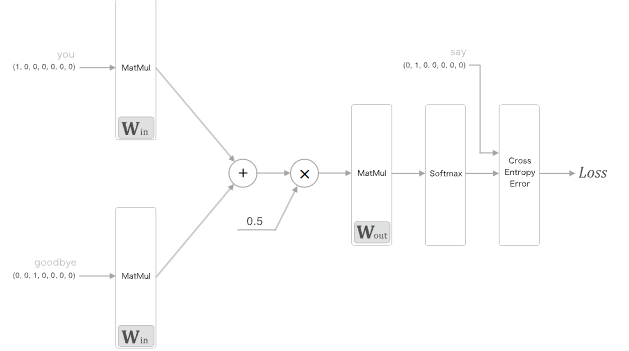

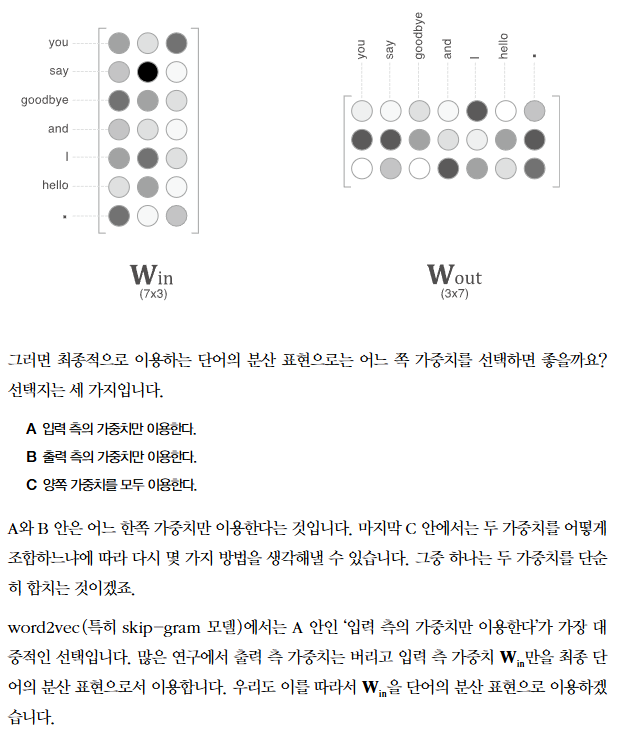

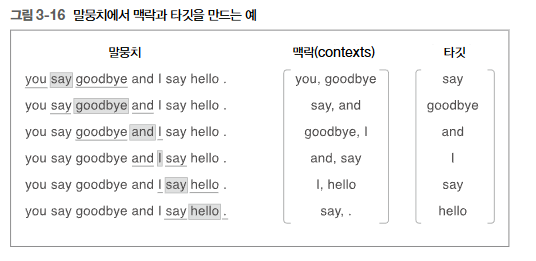
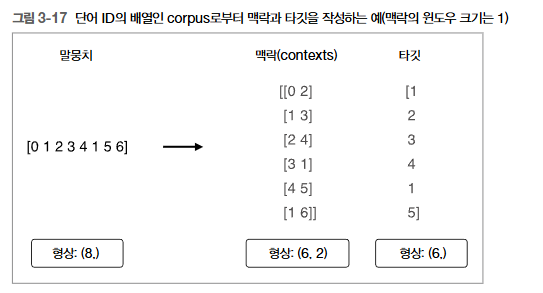

In [10]:
# coding: utf-8
import sys
sys.path.append('..')
from common.util import preprocess, create_co_matrix, cos_similarity


text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
corpus, word_to_id, id_to_word

(array([0, 1, 2, 3, 4, 1, 5, 6]),
 {'you': 0, 'say': 1, 'goodbye': 2, 'and': 3, 'i': 4, 'hello': 5, '.': 6},
 {0: 'you', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'i', 5: 'hello', 6: '.'})

In [11]:
for i in range(1,8):
    print(i)

1
2
3
4
5
6
7


In [12]:
def create_contexts_target(corpus, window_size=1):
    '''맥락과 타깃 생성

    :param corpus: 말뭉치(단어 ID 목록)
    :param window_size: 윈도우 크기(윈도우 크기가 1이면 타깃 단어 좌우 한 단어씩이 맥락에 포함)
    :return: (contexts, target) - 생성된 맥락 배열과 타깃 배열
    '''
    # 양쪽 끝을 잘라낸 타깃 단어 생성 (윈도우 크기에 따라)
    target = corpus[window_size:-window_size] 
    print(f"타깃 단어 (target): {target}")  # 생성된 타깃 단어 출력
    contexts = []  # 맥락을 저장할 빈 리스트 초기화

    # corpus의 각 단어에 대해 반복 (타깃 단어를 제외한 범위)
    for idx in range(window_size, len(corpus) - window_size):
        cs = []  # 현재 단어의 맥락을 저장할 빈 리스트 초기화
        
        #print(f"\n현재 인덱스 (idx): {idx}")  # 현재 인덱스 출력

        # 현재 단어의 양쪽에 있는 단어들을 맥락으로 추가
        for t in range(-window_size, window_size + 1): # -1~1부터 시작하여 좌,우 위치
            if t == 0:  # 현재 단어는 맥락에 포함하지 않음
                continue
            #print(idx,t)
            
            context_word = corpus[idx + t]
            cs.append(context_word)  # 맥락 리스트에 단어 추가
            #print(f"추가된 맥락 단어: {context_word}")  # 추가된 단어 출력

        contexts.append(cs)  # 생성된 맥락을 전체 맥락 리스트에 추가
        #print(f"현재 맥락 (cs): {cs}")  # 현재 맥락 출력

    # numpy 배열로 변환하여 반환
    contexts_array = np.array(contexts)
    #print(f"\n최종 맥락 배열 (contexts): {contexts_array}")  # 최종 맥락 배열 출력
    #print(f"최종 타깃 배열 (target): {target}")  # 최종 타깃 배열 출력
    return contexts_array, np.array(target)


In [13]:
corpus

array([0, 1, 2, 3, 4, 1, 5, 6])

In [14]:
c,t=create_contexts_target(corpus,window_size=1)


타깃 단어 (target): [1 2 3 4 1 5]


In [15]:
print(c)
print(t)

[[0 2]
 [1 3]
 [2 4]
 [3 1]
 [4 5]
 [1 6]]
[1 2 3 4 1 5]


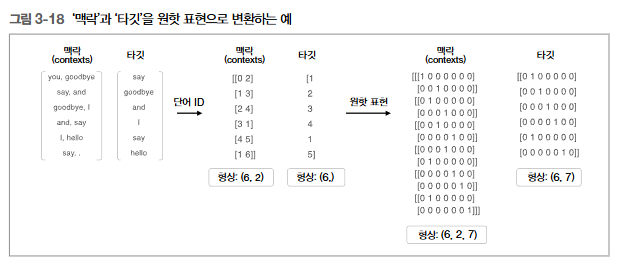

In [16]:
def convert_one_hot(corpus, vocab_size):
    from pprint import pprint
    '''원핫 표현으로 변환
    :param corpus: 단어 ID 목록(타깃, 1차원 또는 맥락, 2차원 넘파이 배열)
    :param vocab_size: 어휘 수
    :return: 원핫 표현(2차원 또는 3차원 넘파이 배열)
    '''
    N = corpus.shape[0]  # 입력 데이터의 첫 번째 차원 크기 (샘플 수)

    pprint(f"==================================================corpus의 형태 {corpus}")

    # 1차원 배열 (타깃 단어) 처리
    if corpus.ndim == 1:
        one_hot = np.zeros((N, vocab_size), dtype=np.int32)  # 어휘 수에 맞는 원핫 배열 초기화
        print(f"1차원 원핫 배열 초기화: {one_hot.shape}")  # 초기화된 원핫 배열의 형태 출력
        
        for idx, word_id in enumerate(corpus):
            one_hot[idx, word_id] = 1  # 해당 단어 ID의 위치에 1 할당
            print(f"단어 ID {word_id}에 대한 원핫 표현: {one_hot[idx]}","\n")  # 현재 단어의 원핫 표현 출력

    # 2차원 배열 (맥락 단어) 처리
    elif corpus.ndim == 2:
        C = corpus.shape[1]  # 두 번째 차원 크기 (맥락 단어 수)
        one_hot = np.zeros((N, C, vocab_size), dtype=np.int32)  # 어휘 수에 맞는 원핫 배열 초기화
        print(f"2차원 원핫 배열 초기화: {one_hot.shape}")  # 초기화된 원핫 배열의 형태 출력
        
        for idx_0, word_ids in enumerate(corpus):
            for idx_1, word_id in enumerate(word_ids):
                one_hot[idx_0, idx_1, word_id] = 1  # 해당 단어 ID의 위치에 1 할당
                print(f"샘플 {idx_0}, 맥락 인덱스 {idx_1}의 단어 ID {word_id}에 대한 원핫 표현: {one_hot[idx_0, idx_1]}")  # 현재 단어의 원핫 표현 출력

    return one_hot  # 최종 원핫 배열 반환


In [17]:
corpus,corpus.ndim

(array([0, 1, 2, 3, 4, 1, 5, 6]), 1)

In [18]:
vocab_size = len(word_to_id)
contexts, target = create_contexts_target(corpus, 1)

타깃 단어 (target): [1 2 3 4 1 5]


In [19]:
target = convert_one_hot(target, vocab_size)
contexts = convert_one_hot(contexts, vocab_size)

'==================================================corpus의 형태 [1 2 3 4 1 5]'
1차원 원핫 배열 초기화: (6, 7)
단어 ID 1에 대한 원핫 표현: [0 1 0 0 0 0 0] 

단어 ID 2에 대한 원핫 표현: [0 0 1 0 0 0 0] 

단어 ID 3에 대한 원핫 표현: [0 0 0 1 0 0 0] 

단어 ID 4에 대한 원핫 표현: [0 0 0 0 1 0 0] 

단어 ID 1에 대한 원핫 표현: [0 1 0 0 0 0 0] 

단어 ID 5에 대한 원핫 표현: [0 0 0 0 0 1 0] 

('==================================================corpus의 형태 [[0 2]\n'
 ' [1 3]\n'
 ' [2 4]\n'
 ' [3 1]\n'
 ' [4 5]\n'
 ' [1 6]]')
2차원 원핫 배열 초기화: (6, 2, 7)
샘플 0, 맥락 인덱스 0의 단어 ID 0에 대한 원핫 표현: [1 0 0 0 0 0 0]
샘플 0, 맥락 인덱스 1의 단어 ID 2에 대한 원핫 표현: [0 0 1 0 0 0 0]
샘플 1, 맥락 인덱스 0의 단어 ID 1에 대한 원핫 표현: [0 1 0 0 0 0 0]
샘플 1, 맥락 인덱스 1의 단어 ID 3에 대한 원핫 표현: [0 0 0 1 0 0 0]
샘플 2, 맥락 인덱스 0의 단어 ID 2에 대한 원핫 표현: [0 0 1 0 0 0 0]
샘플 2, 맥락 인덱스 1의 단어 ID 4에 대한 원핫 표현: [0 0 0 0 1 0 0]
샘플 3, 맥락 인덱스 0의 단어 ID 3에 대한 원핫 표현: [0 0 0 1 0 0 0]
샘플 3, 맥락 인덱스 1의 단어 ID 1에 대한 원핫 표현: [0 1 0 0 0 0 0]
샘플 4, 맥락 인덱스 0의 단어 ID 4에 대한 원핫 표현: [0 0 0 0 1 0 0]
샘플 4, 맥락 인덱스 1의 단어 ID 5에 대한 원핫 표현: [0 0 0 0 0 1 0]
샘플 5, 맥락 인덱

In [20]:
contexts # 문맥

array([[[1, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0]],

       [[0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0]],

       [[0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0]],

       [[0, 0, 0, 1, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0]],

       [[0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 1, 0]],

       [[0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1]]])

In [21]:
target # 타겟

array([[0, 1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0]])

## CBOW 모델 구현
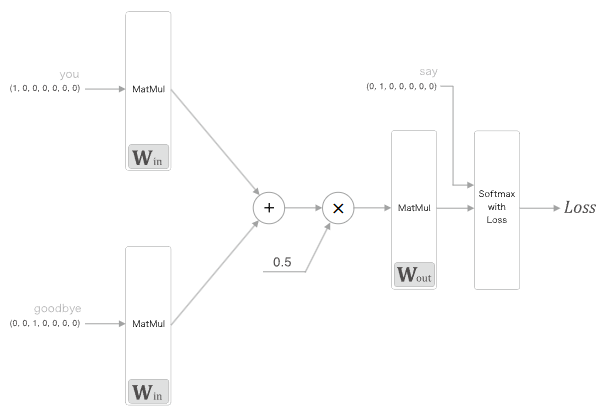

```python
class MatMul:
    def __init__(self, W):
        self.params = [W]
        self.grads = [np.zeros_like(W)]
        self.x = None

    def forward(self, x):
        W, = self.params
        out = np.dot(x, W)
        self.x = x
        return out

    def backward(self, dout):
        W, = self.params
        dx = np.dot(dout, W.T)
        dW = np.dot(self.x.T, dout)
        self.grads[0][...] = dW
        return dx
```

```python
class SoftmaxWithLoss:
    def __init__(self):
        self.params, self.grads = [], []
        self.y = None  # softmax의 출력
        self.t = None  # 정답 레이블

    def forward(self, x, t):
        self.t = t
        self.y = softmax(x)

        # 정답 레이블이 원핫 벡터일 경우 정답의 인덱스로 변환
        if self.t.size == self.y.size:
            self.t = self.t.argmax(axis=1)

        loss = cross_entropy_error(self.y, self.t)
        return loss

    def backward(self, dout=1):
        batch_size = self.t.shape[0]

        dx = self.y.copy()
        dx[np.arange(batch_size), self.t] -= 1
        dx *= dout
        dx = dx / batch_size

        return dx
```

In [41]:
import numpy as np
from common.layers import SoftmaxWithLoss

class SimpleCBOW:
    def __init__(self, vocab_size, hidden_size):
        """
        CBOW 모델 초기화. 단어 분산 표현을 위한 임베딩 행렬과 가중치를 초기화합니다.

        매개변수:
        vocab_size (int): 어휘의 크기 (단어 수).
        hidden_size (int): 은닉층 크기 (임베딩 차원 수).

        예시:
        vocab_size = 10
        hidden_size = 3
        모델은 vocab_size * hidden_size 크기의 가중치 행렬을 생성합니다.
        """
        V, H = vocab_size, hidden_size

        # 가중치 초기화
        W_in = 0.01 * np.random.randn(V, H).astype('f')
        self.first_W_in = W_in.copy()  # 초기 가중치 저장
        W_out = 0.01 * np.random.randn(H, V).astype('f')

        # 계층 생성
        self.in_layer0 = MatMul(W_in)
        self.in_layer1 = MatMul(W_in)
        self.out_layer = MatMul(W_out)
        self.loss_layer = SoftmaxWithLoss()

        # 모든 가중치와 기울기를 리스트에 모은다.
        layers = [self.in_layer0, self.in_layer1, self.out_layer]
        self.params, self.grads = [], []
        for layer in layers:
            self.params += layer.params
            self.grads += layer.grads

        # 인스턴스 변수에 단어의 분산 표현을 저장한다.
        self.word_vecs = W_in

    def forward(self, contexts, target):
        """
        순전파: 문맥 정보(contexts)와 목표 단어(target)를 받아 손실(loss)을 계산합니다.

        매개변수:
        contexts (numpy.ndarray): 주변 단어의 인덱스 정보 (배치 크기, 2). 각 단어는 어휘의 인덱스입니다.
        target (numpy.ndarray): 목표 단어의 인덱스 정보 (배치 크기).

        반환값:
        loss (float): 손실 값.

        예시:
        contexts = np.array([[1, 2], [2, 3]])
        target = np.array([0, 1])
        loss = model.forward(contexts, target)
        """
        h0 = self.in_layer0.forward(contexts[:, 0])
        h1 = self.in_layer1.forward(contexts[:, 1])
        h = (h0 + h1) * 0.5
        score = self.out_layer.forward(h)
        loss = self.loss_layer.forward(score, target)
        return loss

    def backward(self, dout=1):
        """
        역전파: 출력 기울기를 입력까지 전파하여 가중치에 대한 기울기를 계산합니다.

        매개변수:
        dout (int, optional): 상위 계층에서 넘어오는 기울기. 기본값은 1입니다.

        반환값:
        None

        예시:
        모델의 순전파가 끝난 후, 역전파를 통해 기울기를 계산합니다.
        model.backward()
        """
        ds = self.loss_layer.backward(dout)
        da = self.out_layer.backward(ds)
        da *= 0.5
        self.in_layer1.backward(da)
        self.in_layer0.backward(da)
        return None


In [ ]:
import numpy as np

# 예시 context 배열 (6, 2, 7)
context = np.random.randn(6, 2, 7).round(1)

# context[:, 0] 선택
result = context[:, 0] # 첫번째 라인에 대해 값을 추출

print("context:", context)
print("context.shape:", context.shape)
print("context[:, 0].shape:", result.shape)
print("context[:, 0]:")
print(result)


context: [[[ 0.7 -0.4 -1.1 -1.1 -0.3 -1.4  1. ]
  [-0.2 -0.2  1.7  0.7 -0.7 -1.8 -0.1]]

 [[ 0.1 -1.3 -0.6 -0.9 -0.4 -0.2  1.2]
  [ 0.5  1.9  2.2  1.5  0.5  0.1  0.8]]

 [[-0.9 -0.3  0.7 -0.5  0.7 -1.8  0. ]
  [ 1.4 -1.   1.6 -0.9  0.3  0.6 -0.5]]

 [[-0.4 -0.4  0.4  0.9  0.1 -1.4 -2. ]
  [ 1.8 -0.8 -1.4  0.5  0.9  1.  -0.7]]

 [[ 0.3 -1.7  0.9  0.7 -0.5  0.   1.6]
  [ 1.   0.7 -1.2  0.3 -0.2 -0.7  1.2]]

 [[-0.3 -1.3  0.3 -0.   0.1  1.9 -1. ]
  [ 2.3  0.1  1.  -0.9 -0.4  0.6  0.2]]]
context.shape: (6, 2, 7)
context[:, 0].shape: (6, 7)
context[:, 0]:
[[ 0.7 -0.4 -1.1 -1.1 -0.3 -1.4  1. ]
 [ 0.1 -1.3 -0.6 -0.9 -0.4 -0.2  1.2]
 [-0.9 -0.3  0.7 -0.5  0.7 -1.8  0. ]
 [-0.4 -0.4  0.4  0.9  0.1 -1.4 -2. ]
 [ 0.3 -1.7  0.9  0.7 -0.5  0.   1.6]
 [-0.3 -1.3  0.3 -0.   0.1  1.9 -1. ]]


In [42]:
contexts

array([[[1, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0]],

       [[0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0]],

       [[0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0]],

       [[0, 0, 0, 1, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0]],

       [[0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 1, 0]],

       [[0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1]]])

contexts[:, 0]의 의미는:

- 첫 번째 차원(배치 차원)에서 모든 값을 선택하라는 뜻입니다 (:).
- 두 번째 차원(시퀀스 차원)에서 0번째 시퀀스를 선택합니다. 즉, 각 샘플(batch)에서 첫 번째 단어(또는 시퀀스의 - 첫 번째 요소)를 선택하는 것입니다.
- 세 번째 차원은 슬라이싱하지 않았기 때문에, 전체 벡터(embedding)를 선택합니다.

In [43]:
contexts[:,0]

array([[1, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0, 0, 0]])

In [44]:
contexts[:,0],contexts[:, 1]

(array([[1, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0],
        [0, 1, 0, 0, 0, 0, 0]]),
 array([[0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0],
        [0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 1]]))

In [45]:
from common.trainer import Trainer
from common.optimizer import Adam
from common.util import preprocess, create_contexts_target, convert_one_hot


window_size = 1
hidden_size = 5
batch_size = 3
max_epoch = 1000

text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)

vocab_size = len(word_to_id)
contexts, target = create_contexts_target(corpus, window_size)
target = convert_one_hot(target, vocab_size)
contexts = convert_one_hot(contexts, vocab_size)


In [46]:
vocab_size

7

In [47]:
contexts,target

(array([[[1, 0, 0, 0, 0, 0, 0],
         [0, 0, 1, 0, 0, 0, 0]],
 
        [[0, 1, 0, 0, 0, 0, 0],
         [0, 0, 0, 1, 0, 0, 0]],
 
        [[0, 0, 1, 0, 0, 0, 0],
         [0, 0, 0, 0, 1, 0, 0]],
 
        [[0, 0, 0, 1, 0, 0, 0],
         [0, 1, 0, 0, 0, 0, 0]],
 
        [[0, 0, 0, 0, 1, 0, 0],
         [0, 0, 0, 0, 0, 1, 0]],
 
        [[0, 1, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 1]]]),
 array([[0, 1, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0],
        [0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0]]))

In [48]:
model = SimpleCBOW(vocab_size, hidden_size)

In [49]:
model.forward(contexts,target)

1.9460851587529608

backward called
(3, 5)
(5, 7)
backward called
(3, 7)
(7, 5)
backward called
(3, 7)
(7, 5)
| 에폭 1 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
backward called
(3, 5)
(5, 7)
backward called
(3, 7)
(7, 5)
backward called
(3, 7)
(7, 5)
backward called
(3, 5)
(5, 7)
backward called
(3, 7)
(7, 5)
backward called
(3, 7)
(7, 5)
| 에폭 2 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
backward called
(3, 5)
(5, 7)
backward called
(3, 7)
(7, 5)
backward called
(3, 7)
(7, 5)
backward called
(3, 5)
(5, 7)
backward called
(3, 7)
(7, 5)
backward called
(3, 7)
(7, 5)
| 에폭 3 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
backward called
(3, 5)
(5, 7)
backward called
(3, 7)
(7, 5)
backward called
(3, 7)
(7, 5)
backward called
(3, 5)
(5, 7)
backward called
(3, 7)
(7, 5)
backward called
(3, 7)
(7, 5)
| 에폭 4 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
backward called
(3, 5)
(5, 7)
backward called
(3, 7)
(7, 5)
backward called
(3, 7)
(7, 5)
backward called
(3, 5)
(5, 7)
backward called
(3, 7)
(7, 5)
backward called
(3, 7)
(7, 5)
| 에폭 5 |  반복 1 / 2 | 시간 0[s] | 손실 

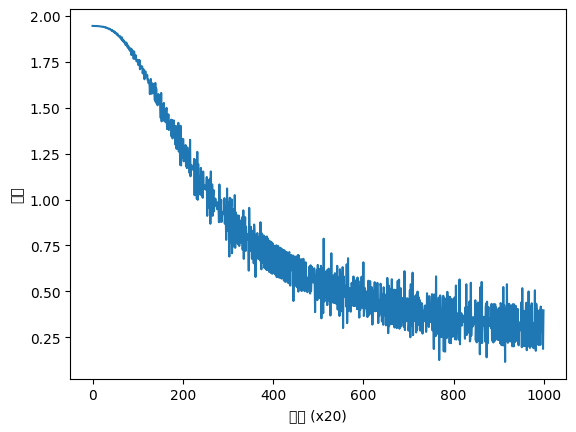

you [ 0.9713576  1.71442    0.9611488 -1.0483761 -1.0634501]
say [-0.24842219  1.097892   -0.35903588  1.390047    0.5605276 ]
goodbye [ 0.9508105  -0.76435244  0.9139849  -1.0225914  -0.98796254]
and [1.3000863 0.7957365 1.3774921 1.3081288 1.5285686]
i [ 0.94486225 -0.76528686  0.88343185 -1.0109748  -0.9753216 ]
hello [ 0.99151874  1.7215662   1.0095859  -1.0730182  -1.0769485 ]
. [-1.2320701  1.104589  -1.254494   1.0496033 -1.3433149]


In [50]:

model = SimpleCBOW(vocab_size, hidden_size)
optimizer = Adam()
trainer = Trainer(model, optimizer)

trainer.fit(contexts, target, max_epoch, batch_size)
trainer.plot()

word_vecs = model.word_vecs
for word_id, word in id_to_word.items():
    print(word, word_vecs[word_id])

In [52]:
from pprint import pprint

for i, (word_id, word) in enumerate(iterable=id_to_word.items()):
    print(f"""{word}, 학습 전: {model.first_W_in[i]} 
    학습 후: {word_vecs[word_id]}\n""")

you, 학습 전: [-0.00369321 -0.00885881 -0.02986791  0.01724127  0.00193714] 
    학습 후: [ 0.9713576  1.71442    0.9611488 -1.0483761 -1.0634501]

say, 학습 전: [ 0.00678069 -0.00209349  0.00704356 -0.00460922 -0.00163633] 
    학습 후: [-0.24842219  1.097892   -0.35903588  1.390047    0.5605276 ]

goodbye, 학습 전: [ 0.00367069 -0.00691869  0.01812193  0.00660457  0.00654847] 
    학습 후: [ 0.9508105  -0.76435244  0.9139849  -1.0225914  -0.98796254]

and, 학습 전: [0.00691878 0.01507202 0.00845375 0.0068523  0.01199353] 
    학습 후: [1.3000863 0.7957365 1.3774921 1.3081288 1.5285686]

i, 학습 전: [ 0.00566661 -0.00141608 -0.00548719  0.00923749  0.00934315] 
    학습 후: [ 0.94486225 -0.76528686  0.88343185 -1.0109748  -0.9753216 ]

hello, 학습 전: [ 0.02150624  0.00104208  0.02386164 -0.01518068 -0.01646447] 
    학습 후: [ 0.99151874  1.7215662   1.0095859  -1.0730182  -1.0769485 ]

., 학습 전: [ 0.00293419  0.00353776 -0.00192876  0.01229029 -0.00204623] 
    학습 후: [-1.2320701  1.104589  -1.254494   1.0496033 -1.3433

In [53]:
model.first_W_in

array([[-0.00369321, -0.00885881, -0.02986791,  0.01724127,  0.00193714],
       [ 0.00678069, -0.00209349,  0.00704356, -0.00460922, -0.00163633],
       [ 0.00367069, -0.00691869,  0.01812193,  0.00660457,  0.00654847],
       [ 0.00691878,  0.01507202,  0.00845375,  0.0068523 ,  0.01199353],
       [ 0.00566661, -0.00141608, -0.00548719,  0.00923749,  0.00934315],
       [ 0.02150624,  0.00104208,  0.02386164, -0.01518068, -0.01646447],
       [ 0.00293419,  0.00353776, -0.00192876,  0.01229029, -0.00204623]],
      dtype=float32)

In [54]:
word_vecs

array([[ 0.9713576 ,  1.71442   ,  0.9611488 , -1.0483761 , -1.0634501 ],
       [-0.24842219,  1.097892  , -0.35903588,  1.390047  ,  0.5605276 ],
       [ 0.9508105 , -0.76435244,  0.9139849 , -1.0225914 , -0.98796254],
       [ 1.3000863 ,  0.7957365 ,  1.3774921 ,  1.3081288 ,  1.5285686 ],
       [ 0.94486225, -0.76528686,  0.88343185, -1.0109748 , -0.9753216 ],
       [ 0.99151874,  1.7215662 ,  1.0095859 , -1.0730182 , -1.0769485 ],
       [-1.2320701 ,  1.104589  , -1.254494  ,  1.0496033 , -1.3433149 ]],
      dtype=float32)

In [56]:
# 차이 확인
pre_training_vecs = np.array([model.first_W_in[i] for i in range(len(id_to_word))])
post_training_vecs = np.array([word_vecs[word_id] for word_id in id_to_word.keys()])

# 차이 계산
differences = post_training_vecs - pre_training_vecs
print("Differences in embeddings:\n", differences)

# 최대 차이 출력
print("Maximum difference in embeddings:", np.max(np.abs(differences)))


Differences in embeddings:
 [[ 0.9750508   1.7232788   0.9910167  -1.0656173  -1.0653872 ]
 [-0.2552029   1.0999855  -0.36607945  1.3946562   0.56216395]
 [ 0.9471398  -0.7574338   0.895863   -1.0291959  -0.994511  ]
 [ 1.2931675   0.7806645   1.3690383   1.3012766   1.5165751 ]
 [ 0.93919563 -0.7638708   0.88891906 -1.0202123  -0.98466474]
 [ 0.9700125   1.7205241   0.9857242  -1.0578375  -1.060484  ]
 [-1.2350043   1.1010512  -1.2525651   1.0373131  -1.3412687 ]]
Maximum difference in embeddings: 1.7232788


In [57]:
import numpy as np
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# 학습 전 단어 임베딩을 numpy 배열로 변환
pre_training_vecs = np.array([model.first_W_in[i] for i in range(len(id_to_word))])

# 학습 후 단어 임베딩을 numpy 배열로 변환
post_training_vecs = np.array([word_vecs[word_id] for word_id in id_to_word.keys()])

# 단어와 해당 위치를 매핑
word_labels = [word for _, word in id_to_word.items()]

# 애니메이션 데이터 생성
frames = []
n_steps = 30  # 애니메이션 프레임 수

for step in range(n_steps + 1):
    # 각 단계에서의 위치 계산
    interpolated_positions = pre_training_vecs + (post_training_vecs - pre_training_vecs) * (step / n_steps)
    frames.append(go.Frame(data=[
        go.Scatter(
            x=interpolated_positions[:, 0],
            y=interpolated_positions[:, 1],
            mode='markers+text',
            text=word_labels,
            textposition='top center',
            marker=dict(size=10, color='blue')
        )
    ], name=f'Step {step}'))

# 초기 위치 플롯
initial_trace = go.Scatter(
    x=pre_training_vecs[:, 0],
    y=pre_training_vecs[:, 1],
    mode='markers+text',
    text=word_labels,
    textposition='top center',
    marker=dict(size=10, color='blue'),
    name='Before Training'
)

# 학습 후 위치 플롯
final_trace = go.Scatter(
    x=post_training_vecs[:, 0],
    y=post_training_vecs[:, 1],
    mode='markers+text',
    text=word_labels,
    textposition='top center',
    marker=dict(size=10, color='red'),
    name='After Training'
)

# 서브플롯 설정
fig = make_subplots(rows=1, cols=1)

# 초기 트레이스 추가
fig.add_trace(initial_trace)

# 애니메이션 프레임 추가
fig.frames = frames

# 애니메이션 속성 설정
fig.update_layout(
    title='Word Embedding Movement During Training',
    showlegend=True,
    updatemenus=[{
        'buttons': [
            {
                'args': [None, {'frame': {'duration': 100, 'redraw': True}, 'mode': 'immediate'}],
                'label': 'Play',
                'method': 'animate',
            },
            {
                'args': [[None], {'frame': {'duration': 0, 'mode': 'immediate'}}],
                'label': 'Pause',
                'method': 'animate',
            },
        ],
        'direction': 'down',
        'showactive': False,
        'type': 'dropdown',
        'x': 0.1,
        'xanchor': 'left',
        'y': 1.1,
        'yanchor': 'top',
    }],
    xaxis_title='Dimension 1',
    yaxis_title='Dimension 2'
)

# 플롯 보여주기
fig.show()


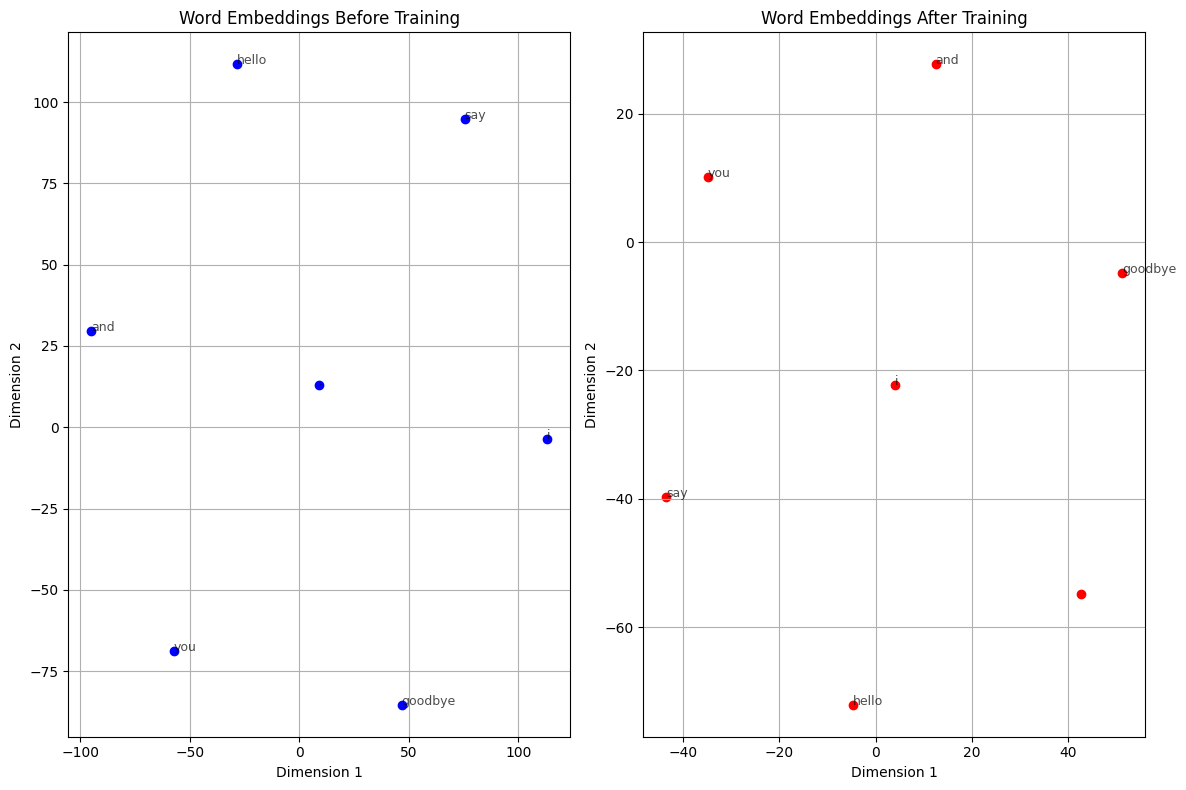

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# 학습 전 단어 임베딩을 numpy 배열로 변환
pre_training_vecs = np.array([model.first_W_in[i] for i in range(len(id_to_word))])

# 학습 후 단어 임베딩을 numpy 배열로 변환
post_training_vecs = np.array([word_vecs[word_id] for word_id in id_to_word.keys()])

# 샘플 수 확인
n_samples = pre_training_vecs.shape[0]

# t-SNE를 사용하여 2차원으로 축소
tsne = TSNE(n_components=2, perplexity=min(30, n_samples-1), random_state=0)

# 학습 전과 후 임베딩을 각각 2D로 축소
pre_training_2d = tsne.fit_transform(pre_training_vecs)
post_training_2d = tsne.fit_transform(post_training_vecs)

# 단어와 해당 위치를 매핑
word_labels = [word for _, word in id_to_word.items()]

# 시각화
plt.figure(figsize=(12, 8))

# 학습 전 위치
plt.subplot(1, 2, 1)
plt.scatter(pre_training_2d[:, 0], pre_training_2d[:, 1], marker='o', color='blue', label='Before Training')
for i, word in enumerate(word_labels):
    plt.annotate(word, (pre_training_2d[i, 0], pre_training_2d[i, 1]), fontsize=9, alpha=0.7)
plt.title('Word Embeddings Before Training')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.grid()

# 학습 후 위치
plt.subplot(1, 2, 2)
plt.scatter(post_training_2d[:, 0], post_training_2d[:, 1], marker='o', color='red', label='After Training')
for i, word in enumerate(word_labels):
    plt.annotate(word, (post_training_2d[i, 0], post_training_2d[i, 1]), fontsize=9, alpha=0.7)
plt.title('Word Embeddings After Training')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.grid()

plt.tight_layout()
plt.show()


In [59]:
pre_training_vecs

array([[-0.00369321, -0.00885881, -0.02986791,  0.01724127,  0.00193714],
       [ 0.00678069, -0.00209349,  0.00704356, -0.00460922, -0.00163633],
       [ 0.00367069, -0.00691869,  0.01812193,  0.00660457,  0.00654847],
       [ 0.00691878,  0.01507202,  0.00845375,  0.0068523 ,  0.01199353],
       [ 0.00566661, -0.00141608, -0.00548719,  0.00923749,  0.00934315],
       [ 0.02150624,  0.00104208,  0.02386164, -0.01518068, -0.01646447],
       [ 0.00293419,  0.00353776, -0.00192876,  0.01229029, -0.00204623]],
      dtype=float32)

In [60]:
post_training_vecs

array([[ 0.9713576 ,  1.71442   ,  0.9611488 , -1.0483761 , -1.0634501 ],
       [-0.24842219,  1.097892  , -0.35903588,  1.390047  ,  0.5605276 ],
       [ 0.9508105 , -0.76435244,  0.9139849 , -1.0225914 , -0.98796254],
       [ 1.3000863 ,  0.7957365 ,  1.3774921 ,  1.3081288 ,  1.5285686 ],
       [ 0.94486225, -0.76528686,  0.88343185, -1.0109748 , -0.9753216 ],
       [ 0.99151874,  1.7215662 ,  1.0095859 , -1.0730182 , -1.0769485 ],
       [-1.2320701 ,  1.104589  , -1.254494  ,  1.0496033 , -1.3433149 ]],
      dtype=float32)

## skip-gram
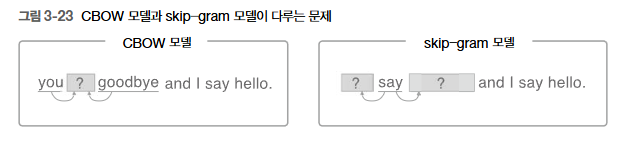
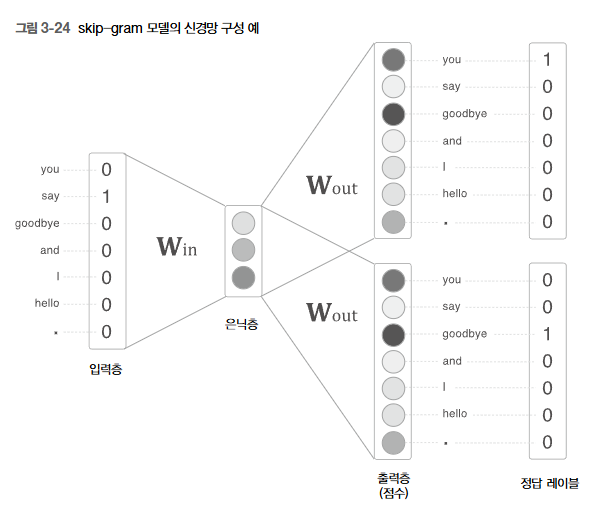